In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# 6.1 Identifying Missing Data
# We will use the orders table from Super Store for these tasks
orders = pd.read_csv('./orders.csv')


# A. Start with some exploratory analysis methods to inspect the data


In [3]:
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.3,0.3,NaN,9954.0
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,NaN,4792.0
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.3,0.3,NaN,19848.0
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,NaN,1410.0
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,NaN,1826.0


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999991 entries, 0 to 999990
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     999991 non-null  object 
 1   order_date   999991 non-null  object 
 2   ship_date    999991 non-null  object 
 3   ship_mode    999991 non-null  object 
 4   customer_id  999991 non-null  object 
 5   product_id   999991 non-null  object 
 6   sales        999991 non-null  float64
 7   quantity     999991 non-null  int64  
 8   discount     999991 non-null  float64
 9   profit       999991 non-null  float64
 10  postal_code  192888 non-null  float64
 11  region_id    999795 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 91.6+ MB


In [5]:
orders.describe()

,sales,quantity,discount,profit,postal_code,region_id
count,999991.000000,999991.000000,999991.000000,999991.000000,192888.000000,999795.000000
mean,245.885888,3.477444,0.247224,1.658624,55348.941095,6370.559013
std,481.540695,2.285502,0.137232,39.977661,32145.458536,10456.510728
min,0.440000,1.000000,0.000000,-6599.980000,1040.000000,38.000000
25%,30.680000,2.000000,0.130000,0.100000,23320.000000,2125.000000
50%,84.780000,3.000000,0.250000,0.200000,57103.000000,3688.000000
75%,250.740000,5.000000,0.350000,0.290000,90049.000000,5636.000000
max,22638.480000,14.000000,0.670000,8399.980000,99301.000000,98923.000000


In [6]:
orders.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'product_id', 'sales', 'quantity', 'discount', 'profit', 'postal_code',
       'region_id'],
      dtype='object')

In [7]:
orders.shape

(999991, 12)

In [8]:
pd.DataFrame(orders.dtypes, columns=["Datatype"])

,Datatype
order_id,object
order_date,object
ship_date,object
ship_mode,object
customer_id,object
product_id,object
sales,float64
quantity,int64
discount,float64
profit,float64


In [9]:
# B. Which column has the most missing data? Sort the columns by sum of null values
orders.isnull().sum().sort_values(ascending=False)


postal_code    807103
region_id         196
profit              0
discount            0
quantity            0
sales               0
product_id          0
customer_id         0
ship_mode           0
ship_date           0
order_date          0
order_id            0
dtype: int64

In [10]:
# C. Looks like postal_code is our biggest problem, along with region_id
# Use a combination of filtering, isnull, and sum to count how many rows are missing both columns

orders[orders["postal_code"].isnull()]['region_id'].isnull().sum()


196

In [11]:
# D. Let's drop the region_id nulls from the dataframe before proceeding
orders.dropna( ['region_id'], inplace =True)


TypeError: supplying multiple axes to axis is no longer supported.

In [12]:
# E. It's the dream scenario! The IT team confirms all missing postal_code values should be 10001.0

orders['postal_code'].fillna(10001.0, inplace =True)

In [13]:
# 6.2 Cleaning Our Data
# A. Write a profit_margin function that accepts a row of data, which is a dictionary
#    It should return the result of dividing the profit column by the sales column (i.e. profit/sales)

def profit_margin(data):
    return(data['profit']/data['sales'])


# orders['profit_magin']= orders['profit']/orders['sales']

In [14]:
profit_margin(orders)

0         0.003629
1         0.006377
2         0.003629
3         0.006377
4         0.006377
            ...   
999986    0.077586
999987    0.077586
999988    0.003210
999989    0.003210
999990    0.002820
Length: 999991, dtype: float64

In [15]:
# B. Create a new column in the orders dataframe called 'profit_margin' by applying the profit margin function row-by-row

orders['profit_margin']=orders.apply(profit_margin, axis =1)

In [16]:
orders

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,9954.0,0.003629
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,4792.0,0.006377
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,19848.0,0.003629
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1410.0,0.006377
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1826.0,0.006377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3210.0,0.077586
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3539.0,0.077586
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,3855.0,0.003210
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,783.0,0.003210


In [17]:
# C. Use the same process to create a new column called margin_category
# If the profit_margin is less than 0, the margin_category should be "unprofitable"
# If the profit_margin is 0, the margin_category should be "break even"
# If the profit_margin is above 0, the margin_category should "profitable"

def margin_categories(row):
    if row['profit_margin'] < 0:
        return 'unprofitable'
    elif row['profit_margin'] == 0:
        return 'break even'
    else:
        return 'profitable'
    
orders['margin_categories']=orders.apply(margin_categories, axis =1)

In [18]:
orders

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin,margin_categories
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,9954.0,0.003629,profitable
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,4792.0,0.006377,profitable
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,19848.0,0.003629,profitable
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1410.0,0.006377,profitable
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1826.0,0.006377,profitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3210.0,0.077586,profitable
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3539.0,0.077586,profitable
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,3855.0,0.003210,profitable
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,783.0,0.003210,profitable


In [19]:
# D. How many of our orders were unprofitable?

print(orders['margin_categories'].value_counts())
print('\n')
print("unprofitable :", orders['margin_categories'].value_counts().unprofitable)

profitable      876500
break even      110952
unprofitable     12539
Name: margin_categories, dtype: int64


unprofitable : 12539


In [20]:
orders[orders['margin_categories'] == "unprofitable"].shape[0]

12539

In [21]:
# 6.3 GroupBy Insights
# Segment the following data and explore aggregate values to answer the following questions

In [22]:
# A. Which discount results in the highest mean order quantity?

orders.groupby (by = ['discount'])['quantity'].mean().sort_values(ascending = False).iloc[[0]].index[0]

0.63

In [23]:

orders.groupby (by = ['discount'])['quantity'].mean().sort_values(ascending = False).head(1)

discount
0.63    4.605882
Name: quantity, dtype: float64

In [24]:
# B. Which product has the highest mean price discount applied?

orders.groupby (by = ['product_id'])['discount'].mean().sort_values(ascending = False).iloc[[0]]

product_id
OFF-AP-10002899    0.648485
Name: discount, dtype: float64

In [25]:
# 6.4 Joining DataFrames
# The below example joins our first two dataframes by their shared column, Symbol
openprice = pd.DataFrame({'Symbol': ['AAPL', 'DHR', 'DAL', 'AMZN'], 'OpenPrice': [217.51, 96.54, 51.45, 1703.34]})
wkhigh = pd.DataFrame({'Symbol': ['DAL', 'AMZN', 'AAPL', 'DHR'], '52wkHigh': [60.79, 2050.49, 233.47, 110.11]})
combined = pd.merge(openprice, wkhigh, how="left", left_on='Symbol', right_on='Symbol')
combined.head()

,Symbol,OpenPrice,52wkHigh
0,AAPL,217.51,233.47
1,DHR,96.54,110.11
2,DAL,51.45,60.79
3,AMZN,1703.34,2050.49


In [26]:
# A. Join the stockname dataframe to our combined result and print the result
stockname = pd.DataFrame({'Symbol': ['AMZN', 'DHR', 'DAL', 'AAPL'], 'Name': ['Amazon', 'Danaher', 'Delta Airlines', 'Apple']})
stockname

,Symbol,Name
0,AMZN,Amazon
1,DHR,Danaher
2,DAL,Delta Airlines
3,AAPL,Apple


In [27]:
combined_result = pd.merge(left = stockname, right= combined, how="left", on='Symbol')
combined_result

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,DHR,Danaher,96.54,110.11
2,DAL,Delta Airlines,51.45,60.79
3,AAPL,Apple,217.51,233.47


In [28]:
# B. Use the following tables from Super Store
products = pd.read_csv('./products.csv')
orders = pd.read_csv('./orders.csv')
returns = pd.read_csv('./returns.csv')
regions = pd.read_csv('./regions.csv')

In [29]:
products

,product_id,category,sub_category,product_name,product_cost_to_consumer
0,FUR-ADV-10000002,Furniture,Furnishings,"Advantus Photo Frame, Duo Pack",53.04
1,FUR-ADV-10000108,Furniture,Furnishings,"Advantus Clock, Erganomic",50.01
2,FUR-ADV-10000183,Furniture,Furnishings,"Advantus Photo Frame, Black",15.89
3,FUR-ADV-10000188,Furniture,Furnishings,"Advantus Stacking Tray, Erganomic",24.99
4,FUR-ADV-10000190,Furniture,Furnishings,"Advantus Frame, Duo Pack",111.18
...,...,...,...,...,...
10287,TEC-STA-10004181,Technology,Machines,"StarTech Inkjet, Durable",300.18
10288,TEC-STA-10004536,Technology,Machines,"StarTech Inkjet, Wireless",301.77
10289,TEC-STA-10004542,Technology,Machines,"StarTech Calculator, Durable",40.08
10290,TEC-STA-10004834,Technology,Machines,"StarTech Receipt Printer, Red",32.32


In [30]:
orders

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,NaN,9954.0
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,NaN,4792.0
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,NaN,19848.0
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,NaN,1410.0
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,NaN,1826.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,NaN,3210.0
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,NaN,3539.0
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,NaN,3855.0
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,NaN,783.0


In [31]:
# i. We want to join the products and orders dataframes. 
#    Explore both dataframes to identify the common column between them
#    Use a left join to combine the tables in a dataframe named orders_with_products

orders_with_products = pd.merge(left = orders, right = products, how = "left" , on="product_id")


In [32]:
returns

,order_id,return_date,return_quantity,reason_returned
0,AE-2019-1711936,2019-12-14,1,Not Given
1,AE-2019-2092798,2019-11-29,1,Not Given
2,AE-2019-2170363,2019-12-29,1,Not Given
3,AE-2019-2262642,2020-01-04,1,Not Given
4,AE-2019-2343602,2020-01-05,1,Not Given
...,...,...,...,...
49720,ZI-2017-1952198,2017-06-02,1,Wrong Color
49721,ZI-2017-3229188,2017-06-11,1,Wrong Color
49722,ZI-2017-3803578,2017-07-22,1,Wrong Color
49723,ZI-2017-854115,2017-01-24,1,Wrong Item


In [33]:
# ii. Left join the orders_with_products and returns dataframes

orders_with_products_and_returns =  pd.merge(left = orders_with_products, right = returns, how = "left" , on="order_id")
orders_with_products_and_returns

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,category,sub_category,product_name,product_cost_to_consumer,return_date,return_quantity,reason_returned
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,NaN,9954.0,Office Supplies,Storage,"Fellowes File Cart, Industrial",55.12,NaN,NaN,NaN
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,NaN,4792.0,Technology,Machines,"Epson Calculator, Red",13.07,NaN,NaN,NaN
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,NaN,19848.0,Office Supplies,Storage,"Fellowes File Cart, Industrial",55.12,NaN,NaN,NaN
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,NaN,1410.0,Technology,Machines,"Epson Calculator, Red",13.07,NaN,NaN,NaN
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,NaN,1826.0,Technology,Machines,"Epson Calculator, Red",13.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,NaN,3210.0,Office Supplies,Binders,"Avery Hole Reinforcements, Clear",1.16,NaN,NaN,NaN
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,NaN,3539.0,Office Supplies,Binders,"Avery Hole Reinforcements, Clear",1.16,NaN,NaN,NaN
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,NaN,3855.0,Technology,Machines,"Konica Receipt Printer, Red",119.40,NaN,NaN,NaN
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,NaN,783.0,Technology,Machines,"Konica Receipt Printer, Red",119.40,NaN,NaN,NaN


In [34]:
regions

,region_id,country_code,country,region,sub_region,salesperson
0,45585,TH,Thailand,APAC,South-Eastern Asia,Fei Hong
1,4364,PA,Panama,Americas,Central America,Anna Andreadi
2,7530,UA,Ukraine,EMEA,Eastern Europe,Giulietta Dortch
3,28804,KR,South Korea,APAC,Eastern Asia,Wang Xiu Ying
4,4119,SK,Slovakia,EMEA,Eastern Europe,Giulietta Dortch
...,...,...,...,...,...,...
146,15271,UG,Uganda,EMEA,Africa,Deborah Brumfield
147,59565,SO,Somalia,EMEA,Africa,Deborah Brumfield
148,5003,GT,Guatemala,Americas,Central America,Anna Andreadi
149,38912,AM,Armenia,EMEA,Southern Europe,Giulietta Dortch


In [35]:
# iii. Finally, add the region data to our combined dataframe

combined_dataframe =  pd.merge(left = orders_with_products_and_returns, right = regions, how = "left" , on="region_id")
combined_dataframe

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,product_name,product_cost_to_consumer,return_date,return_quantity,reason_returned,country_code,country,region,sub_region,salesperson
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,...,"Fellowes File Cart, Industrial",55.12,NaN,NaN,NaN,EG,Egypt,EMEA,Africa,Deborah Brumfield
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,...,"Epson Calculator, Red",13.07,NaN,NaN,NaN,AU,Australia,APAC,Oceania,Nora Preis
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,...,"Fellowes File Cart, Industrial",55.12,NaN,NaN,NaN,HN,Honduras,Americas,Central America,Anna Andreadi
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,...,"Epson Calculator, Red",13.07,NaN,NaN,NaN,DO,Dominican Republic,Americas,Caribbean,Agwe Aristide
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,...,"Epson Calculator, Red",13.07,NaN,NaN,NaN,IN,India,APAC,Southern Asia,Nicole Hansen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006651,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,...,"Avery Hole Reinforcements, Clear",1.16,NaN,NaN,NaN,NZ,New Zealand,APAC,Oceania,Nora Preis
1006652,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,...,"Avery Hole Reinforcements, Clear",1.16,NaN,NaN,NaN,CU,Cuba,Americas,Caribbean,Agwe Aristide
1006653,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,...,"Konica Receipt Printer, Red",119.40,NaN,NaN,NaN,PH,Philippines,APAC,South-Eastern Asia,Fei Hong
1006654,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,...,"Konica Receipt Printer, Red",119.40,NaN,NaN,NaN,FR,France,EMEA,Western Europe,Anna Andreadi


In [36]:
# iv. Let's use this combined dataframe to determine the salesperson generating the most profit
combined_dataframe.groupby(["salesperson"])["profit"].sum().sort_values(ascending = False).iloc[[0]]

salesperson
Anna Andreadi    280942.09
Name: profit, dtype: float64

In [37]:
orders.shape[0]

999991

In [38]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],  columns=['letter', 'number'])


In [39]:
df_with_more_rows = pd.concat([df1, df2])
df_with_more_rows

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [40]:
df_with_more_columns = pd.concat([df1, df2], axis=1)
df_with_more_columns
                                 

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [41]:
master_table = combined_dataframe
master_table

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,product_name,product_cost_to_consumer,return_date,return_quantity,reason_returned,country_code,country,region,sub_region,salesperson
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,...,"Fellowes File Cart, Industrial",55.12,NaN,NaN,NaN,EG,Egypt,EMEA,Africa,Deborah Brumfield
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,...,"Epson Calculator, Red",13.07,NaN,NaN,NaN,AU,Australia,APAC,Oceania,Nora Preis
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,...,"Fellowes File Cart, Industrial",55.12,NaN,NaN,NaN,HN,Honduras,Americas,Central America,Anna Andreadi
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,...,"Epson Calculator, Red",13.07,NaN,NaN,NaN,DO,Dominican Republic,Americas,Caribbean,Agwe Aristide
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,...,"Epson Calculator, Red",13.07,NaN,NaN,NaN,IN,India,APAC,Southern Asia,Nicole Hansen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006651,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,...,"Avery Hole Reinforcements, Clear",1.16,NaN,NaN,NaN,NZ,New Zealand,APAC,Oceania,Nora Preis
1006652,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,...,"Avery Hole Reinforcements, Clear",1.16,NaN,NaN,NaN,CU,Cuba,Americas,Caribbean,Agwe Aristide
1006653,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,...,"Konica Receipt Printer, Red",119.40,NaN,NaN,NaN,PH,Philippines,APAC,South-Eastern Asia,Fei Hong
1006654,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,...,"Konica Receipt Printer, Red",119.40,NaN,NaN,NaN,FR,France,EMEA,Western Europe,Anna Andreadi


In [42]:
master_table.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'product_id', 'sales', 'quantity', 'discount', 'profit', 'postal_code',
       'region_id', 'category', 'sub_category', 'product_name',
       'product_cost_to_consumer', 'return_date', 'return_quantity',
       'reason_returned', 'country_code', 'country', 'region', 'sub_region',
       'salesperson'],
      dtype='object')

<AxesSubplot:>

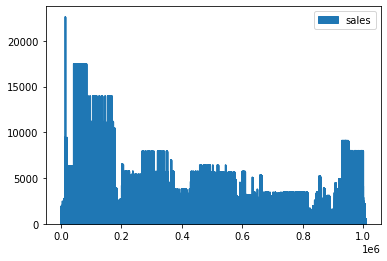

In [43]:
master_table.plot.area(y ='sales')

<AxesSubplot:ylabel='region'>

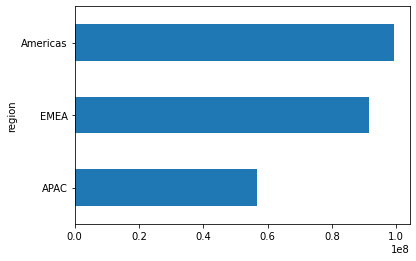

In [81]:
master_table.groupby(["region"]).sum()['sales'].sort_values(ascending=True).plot.barh()


<AxesSubplot:ylabel='region'>

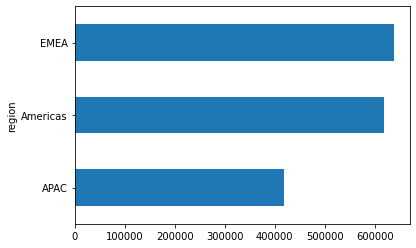

In [114]:
master_table.groupby(["region"]).sum()['profit'].sort_values(ascending=True).plot.barh()


In [2]:
master_table['region'].sort_values()

NameError: name 'master_table' is not defined

In [126]:
%matplotlib inline

In [129]:
df1=master_table[master_table['region']=='APAC']
df2=master_table[master_table['region']=='Americas']
df3=master_table[master_table['region']=='EMEA']

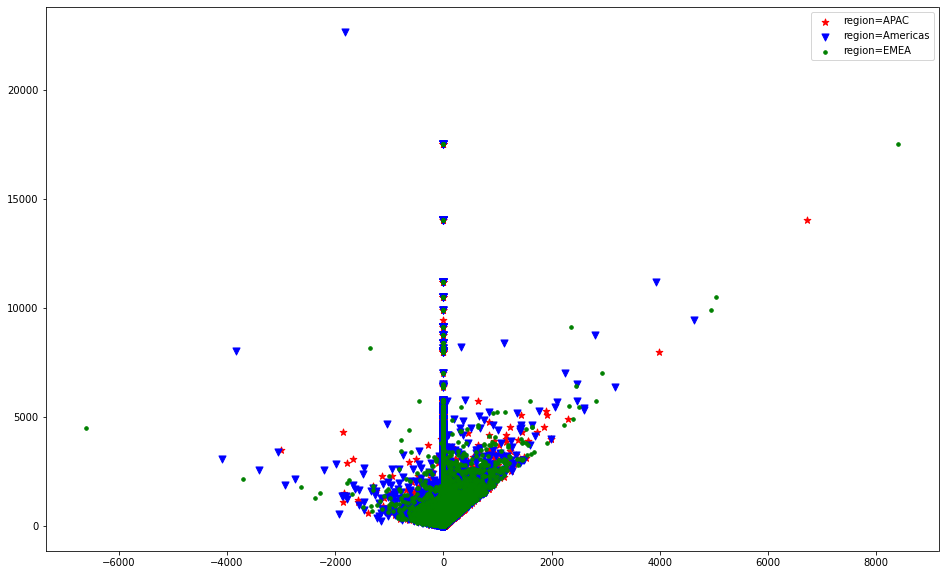

<Figure size 432x720 with 0 Axes>

In [154]:
%matplotlib inline

plt.figure(figsize=(16,10))
# plt.scatter('profit', 'sales', s='bubble_size', data=master_table)
plt.scatter(df1['profit'], df1['sales'], s =50, c='r', marker= '*', label ='region=APAC')
plt.scatter(df2['profit'], df2['sales'], s= 50, c='b', marker= 'v', label ='region=Americas')
plt.scatter(df3['profit'], df3['sales'], s= 50, c='g', marker= '.', label ='region=EMEA')

plt.legend()

plt.show()

In [85]:
import matplotlib.pyplot as plt
import pandas as pd


<AxesSubplot:>

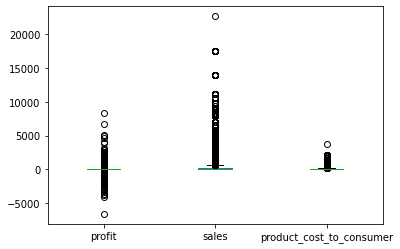

In [83]:
master_table[['profit', 'sales', 'product_cost_to_consumer']].plot.box()